Lakukan Preprocessing Dan Visualisasi Pada Data Diabetes Dengan Ketentuan :
1. Imputasi missing value dengan mean, median, dan modus
2. Cek korelasi antar variabel dengan heatmap
3. Lakukan imbalance handling dengan undersampling
4. Lakukan scaling dengan robust scaler dan minmax

Import Library

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Load Data

In [49]:
data = pd.read_csv('Data_Diabetes.csv')

Menampilkan Informasi Dataset Diabetes

In [50]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB
None


1. Imputasi Missing Value Dengan Mean, Median, Dan Modus

In [51]:
# Cek Missing Value
print("Missing Value Count : ")
print(data.isnull().sum())

# Imputasi Missing Value Dengan Mean
imputer_mean = SimpleImputer(strategy = 'mean')
data_mean = imputer_mean.fit_transform(data)

# Imputasi Missing Value Dengan Median
imputer_median = SimpleImputer(strategy = 'median')
data_median = imputer_median.fit_transform(data)

# Imputasi Missing Value Dengan Modus
imputer_mode = SimpleImputer(strategy = 'most_frequent')
data_mode = imputer_mode.fit_transform(data)

Missing Value Count : 
Pregnancies                  77
Glucose                     115
BloodPressure               154
SkinThickness                38
Insulin                     192
BMI                         230
DiabetesPedigreeFunction     77
Age                         154
Outcome                       0
dtype: int64


2. Cek Korelasi Antar Variabel Dengan Heatmap

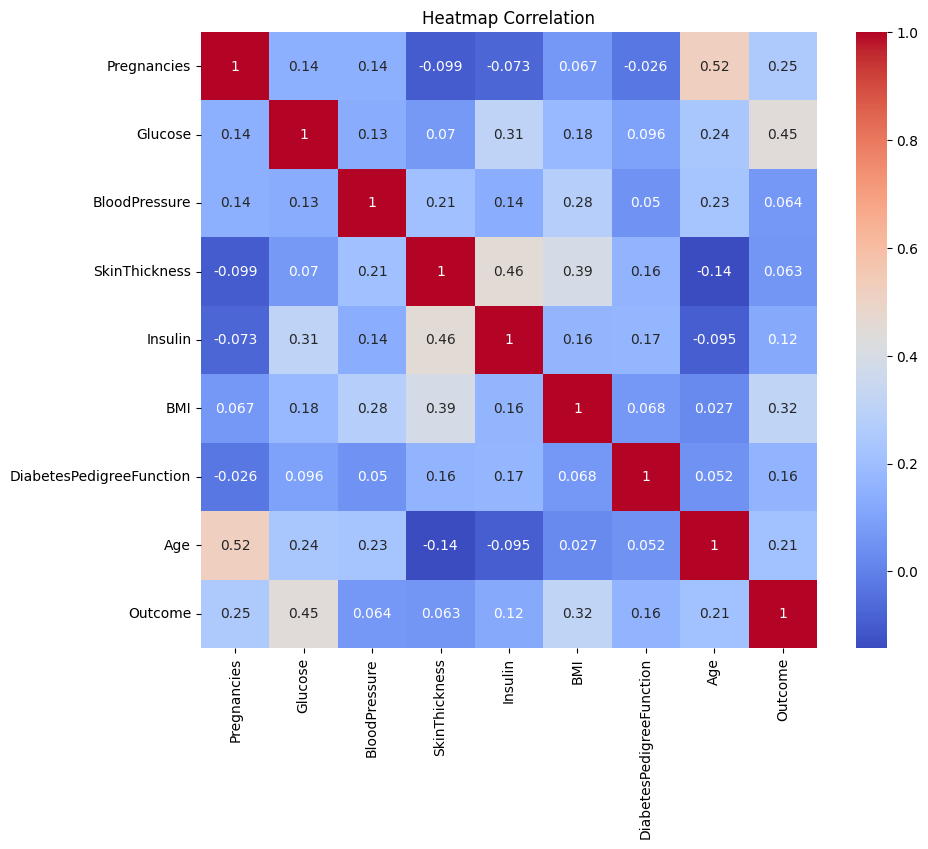

In [52]:
corr_matrix = data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', square = True)
plt.title('Heatmap Correlation')
plt.show()

3. Lakukan Imbalance Handling Dengan Undersampling

In [53]:
# Pisahkan Data Berdasarkan Target Variable 'Outcome'
positive_samples = data[data['Outcome'] == 1]
negative_samples = data[data['Outcome'] == 0]

# Lakukan Undersampling Pada Kelas Mayoritas (0)
undersampled_negative_samples = resample(negative_samples, replace = False, n_samples = len(positive_samples), random_state = 42)

# Gabungkan Kembali Data Yang Telah Di Undersample Dengan Data Asli
data_undersampled = pd.concat([positive_samples, undersampled_negative_samples])

print("Jumlah Data Setelah Undersampling : ")
print(data_undersampled['Outcome'].value_counts())

# Menampilkan Informasi Tentang Data Yang Telah Di-Undersample
print(data_undersampled.info())

Jumlah Data Setelah Undersampling : 
Outcome
1    268
0    268
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 536 entries, 0 to 150
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               481 non-null    float64
 1   Glucose                   447 non-null    float64
 2   BloodPressure             422 non-null    float64
 3   SkinThickness             507 non-null    float64
 4   Insulin                   402 non-null    float64
 5   BMI                       375 non-null    float64
 6   DiabetesPedigreeFunction  480 non-null    float64
 7   Age                       436 non-null    float64
 8   Outcome                   536 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 41.9 KB
None


4. Lakukan Scaling Dengan Robust Scaler Dan Minmax

In [54]:
# Robust Scaler
robust_scaler = RobustScaler()
data_robust = robust_scaler.fit_transform(data_undersampled.drop('Outcome', axis = 1))

data_robust_scaled = pd.DataFrame(data_robust, columns=data_undersampled.drop('Outcome', axis = 1).columns)
data_robust_scaled['Outcome'] = data_undersampled['Outcome']

# Hapus Nilai NaN Jika Ada
data_robust_scaled = data_robust_scaled.dropna()

print("\nData Diabetes Yang Telah Di-Scaling Dengan Robust Scaler : ")
print(data_robust_scaled.head())

# MinMax Scaler
minmax_scaler = MinMaxScaler()
data_minmax = minmax_scaler.fit_transform(data_undersampled.drop('Outcome', axis = 1))

data_minmax_scaled = pd.DataFrame(data_minmax, columns=data_undersampled.drop('Outcome', axis = 1).columns)
data_minmax_scaled['Outcome'] = data_undersampled['Outcome']

# Hapus Nilai NaN Jika Ada
data_minmax_scaled = data_minmax_scaled.dropna()

print("\nData Diabetes Yang Telah Di-Scaling Dengan MinMax Scaler : ")
print(data_minmax_scaled.head())


Data Diabetes Yang Telah Di-Scaling Dengan Robust Scaler : 
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
1           1.0  1.409091         -0.500       -0.75000 -0.130769 -1.139394   
5           1.0  0.090909          1.500       -0.75000 -0.130769 -3.963636   
48         -0.6 -0.363636          0.750       -0.75000 -0.130769 -0.581818   
70          1.6  0.318182         -4.500       -0.75000 -0.130769  2.375758   
72          0.0 -0.318182         -0.625       -0.34375  0.238462 -1.187879   

    DiabetesPedigreeFunction     Age  Outcome  
1                   0.712029  0.0625      0.0  
5                  -0.357230  1.4375      0.0  
48                  0.879708  1.9375      1.0  
70                  0.483597  0.5625      1.0  
72                  0.726610 -0.5000      1.0  

Data Diabetes Yang Telah Di-Scaling Dengan MinMax Scaler : 
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
1      0.470588  0.919598       0.56

Visualisasi Hasil Preprocessing

Classification Report (Robust Scaler) : 
              precision    recall  f1-score   support

         0.0       0.50      0.78      0.61         9
         1.0       0.33      0.12      0.18         8

    accuracy                           0.47        17
   macro avg       0.42      0.45      0.40        17
weighted avg       0.42      0.47      0.41        17

Confusion Matrix (Robust Scaler)      : 
[[7 2]
 [7 1]]
Accuracy Score (Robust Scaler)        :  0.47058823529411764
AUC ROC Score (Robust Scaler)         :  0.4722222222222222
ROC Curve (Robust Scaler)             : 


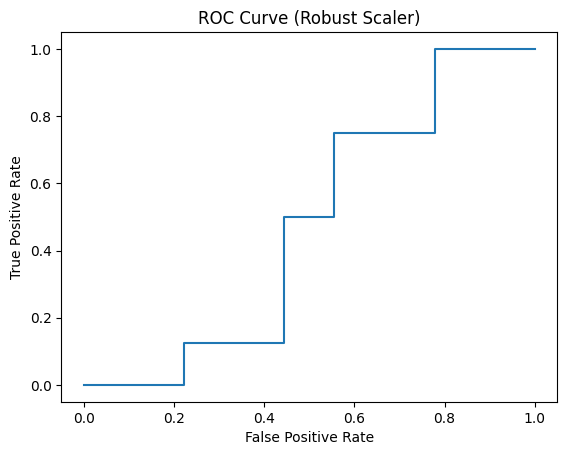

Classification Report (Min-Max Scaler) : 
              precision    recall  f1-score   support

         0.0       0.46      0.67      0.55         9
         1.0       0.25      0.12      0.17         8

    accuracy                           0.41        17
   macro avg       0.36      0.40      0.36        17
weighted avg       0.36      0.41      0.37        17

Confusion Matrix (Min-Max Scaler)      :
[[6 3]
 [7 1]]
Accuracy Score (Min-Max Scaler)        :  0.4117647058823529
AUC ROC Score (Min-Max Scaler)         :  0.4444444444444444
ROC Curve (Min-Max Scaler)             : 


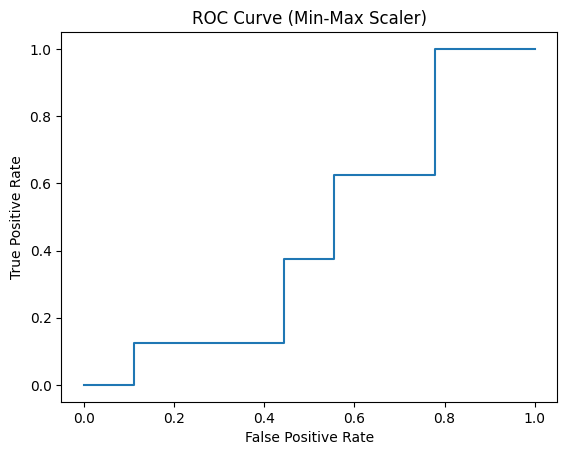

In [56]:
# Membuat Model Logistic Regression Untuk Memprediksi Hasilnya
X_train, X_test, y_train, y_test = train_test_split(data_robust_scaled.drop('Outcome', axis = 1), data_robust_scaled['Outcome'], test_size = 0.2, random_state = 42)

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_robust = model_lr.predict(X_test)

print("Classification Report (Robust Scaler) : ")
print(classification_report(y_test, y_pred_robust))
print("Confusion Matrix (Robust Scaler)      : ")
print(confusion_matrix(y_test, y_pred_robust))
print("Accuracy Score (Robust Scaler)        : ", accuracy_score(y_test, y_pred_robust))
print("AUC ROC Score (Robust Scaler)         : ", roc_auc_score(y_test, model_lr.predict_proba(X_test)[:, 1]))
print("ROC Curve (Robust Scaler)             : ")

fpr, tpr, _ = roc_curve(y_test, model_lr.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.title('ROC Curve (Robust Scaler)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Membuat Model Logistic Regression Untuk Memprediksi Hasilnya Pada Min-Max Scaler
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(data_minmax_scaled.drop('Outcome', axis = 1), data_minmax_scaled['Outcome'], test_size = 0.2, random_state = 42)

model_lr_minmax = LogisticRegression()
model_lr_minmax.fit(X_train_minmax, y_train_minmax)

y_pred_minmax = model_lr_minmax.predict(X_test_minmax)

print("Classification Report (Min-Max Scaler) : ")
print(classification_report(y_test_minmax, y_pred_minmax))
print("Confusion Matrix (Min-Max Scaler)      :" )
print(confusion_matrix(y_test_minmax, y_pred_minmax))
print("Accuracy Score (Min-Max Scaler)        : ", accuracy_score(y_test_minmax, y_pred_minmax))
print("AUC ROC Score (Min-Max Scaler)         : ", roc_auc_score(y_test_minmax, model_lr_minmax.predict_proba(X_test_minmax)[:, 1]))
print("ROC Curve (Min-Max Scaler)             : ")

fpr_minmax, tpr_minmax, _ = roc_curve(y_test_minmax, model_lr_minmax.predict_proba(X_test_minmax)[:, 1])
plt.plot(fpr_minmax, tpr_minmax)
plt.title('ROC Curve (Min-Max Scaler)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()